In [192]:
import geopandas
import matplotlib.pyplot as plt
import contextily
from shapely.geometry import Point
import rasterio
import rasterio.plot
import rasterstats

In [191]:
mining_sites = geopandas.read_file("D:\Data\Mines\ipis_cod_mines.geojson")
mining_sites.head()

,visit_date,name,n_workers,mineral,geometry
0,2013-03-27,Mayi-Tatu,150.0,Gold,POINT (29.66033 1.01089)
1,2013-03-27,Mabanga,115.0,Gold,POINT (29.65862 1.00308)
2,2013-03-27,Molende,130.0,Gold,POINT (29.65629 0.98563)
3,2013-03-27,Embouchure,135.0,Gold,POINT (29.64494 0.99976)
4,2013-03-27,Apumu-Atandele-Jerusalem-Luka Yayo,270.0,Gold,POINT (29.66000 0.95600)


In [6]:
mining_sites.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

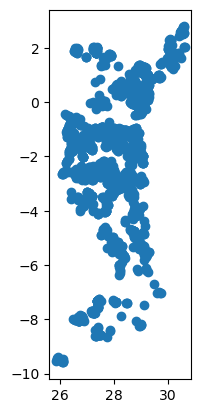

In [7]:
mining_sites.plot()

In [10]:
df=geopandas.read_file(r"C:\Users\Nevra\Pictures\Downloads\wdpamay2017cod-shapefile-polygons.geojson")
df.head()

,WDPAID,WDPA_PID,PA_DEF,NAME,ORIG_NAME,DESIG,DESIG_ENG,DESIG_TYPE,IUCN_CAT,INT_CRIT,...,GOV_TYPE,OWN_TYPE,MANG_AUTH,MANG_PLAN,VERIF,METADATAID,SUB_LOC,PARENT_ISO,ISO3,geometry
0,555555524.0,555555524,1,Lyondji Bonobo Community Reserve,Réserve Communautaires des Bonobos d' Iyondji,Forêt Classée et Réserve Communautaire,Classified Forest and Community Reserve,National,Not Reported,Not Applicable,...,Collaborative governance,Not Reported,l'Institut CongolaispourConservation dela Natu...,Not Reported,Not Reported,1717,Not Reported,COD,COD,"MULTIPOLYGON (((22.78361 0.18587, 22.78492 0.1..."
1,478291.0,478291,1,Parc national des Virunga,Parc national des Virunga,"Ramsar Site, Wetland of International Importance","Ramsar Site, Wetland of International Importance",International,Not Reported,Not Reported,...,Not Reported,Not Reported,Not Reported,Management plan is not implented but is available,State Verified,1856,Not Reported,COD,COD,"MULTIPOLYGON (((29.11713 -1.64822, 29.11765 -1..."
2,72340.0,72340,1,Luo Scientific Reserve,Réserve Scientifique de la Luo,Réserve,Scientific Reserve,National,Not Reported,Not Applicable,...,Government-delegated management,Not Reported,Center for Research in Natural Sciences (CRSN/...,Not Reported,Not Reported,1717,Not Reported,COD,COD,"MULTIPOLYGON (((22.56673 0.24907, 22.57264 0.2..."
3,478292.0,478292,1,Salonga,Parc National de la Salonga,Réserve Naturelle Integrale,Integrale Nature Reserve,National,II,Not Applicable,...,Not Reported,Not Reported,Not Reported,Not Reported,Not Reported,1717,Not Reported,COD,COD,"MULTIPOLYGON (((20.47664 -1.53041, 20.47703 -1..."
4,9143.0,9143,1,Réserve forestière de Luki,Réserve forestière de Luki,UNESCO-MAB Biosphere Reserve,UNESCO-MAB Biosphere Reserve,International,Not Applicable,Not Applicable,...,Not Reported,Not Reported,Not Reported,Not Reported,Not Reported,715,CD-KW,COD,COD,"MULTIPOLYGON (((13.24173 -5.50931, 13.23929 -5..."


In [11]:
df.columns

Index(['WDPAID', 'WDPA_PID', 'PA_DEF', 'NAME', 'ORIG_NAME', 'DESIG',
       'DESIG_ENG', 'DESIG_TYPE', 'IUCN_CAT', 'INT_CRIT', 'MARINE',
       'REP_M_AREA', 'GIS_M_AREA', 'REP_AREA', 'GIS_AREA', 'NO_TAKE',
       'NO_TK_AREA', 'STATUS', 'STATUS_YR', 'GOV_TYPE', 'OWN_TYPE',
       'MANG_AUTH', 'MANG_PLAN', 'VERIF', 'METADATAID', 'SUB_LOC',
       'PARENT_ISO', 'ISO3', 'geometry'],
      dtype='object')

In [17]:
df.DESIG_ENG

0              Classified Forest and Community Reserve
1     Ramsar Site, Wetland of International Importance
2                                   Scientific Reserve
3                             Integrale Nature Reserve
4                         UNESCO-MAB Biosphere Reserve
5                                       Nature Reserve
6                                        National Park
7                                       Nature Reserve
8                                       Nature Reserve
9                                        National Park
10                                       National Park
11                                       National Park
12                                       National Park
13                                       National Park
14                                        Hunting Area
15                                        Hunting Area
16                                        Not Reported
17                                        Not Reported
18        

In [20]:
national_parks=df[["DESIG_ENG","NAME","geometry"]]
national_parks.head()

,DESIG_ENG,NAME,geometry
0,Classified Forest and Community Reserve,Lyondji Bonobo Community Reserve,"MULTIPOLYGON (((22.78361 0.18587, 22.78492 0.1..."
1,"Ramsar Site, Wetland of International Importance",Parc national des Virunga,"MULTIPOLYGON (((29.11713 -1.64822, 29.11765 -1..."
2,Scientific Reserve,Luo Scientific Reserve,"MULTIPOLYGON (((22.56673 0.24907, 22.57264 0.2..."
3,Integrale Nature Reserve,Salonga,"MULTIPOLYGON (((20.47664 -1.53041, 20.47703 -1..."
4,UNESCO-MAB Biosphere Reserve,Réserve forestière de Luki,"MULTIPOLYGON (((13.24173 -5.50931, 13.23929 -5..."


In [23]:
national_parks.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

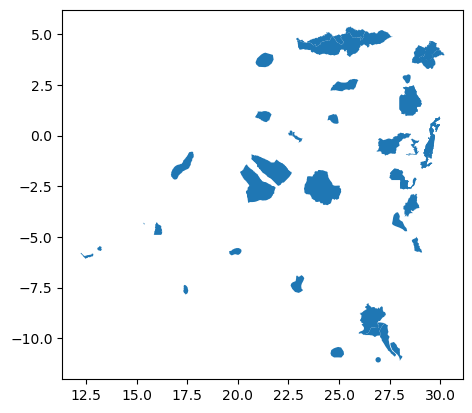

In [25]:
national_parks.plot()

<AxesSubplot:>

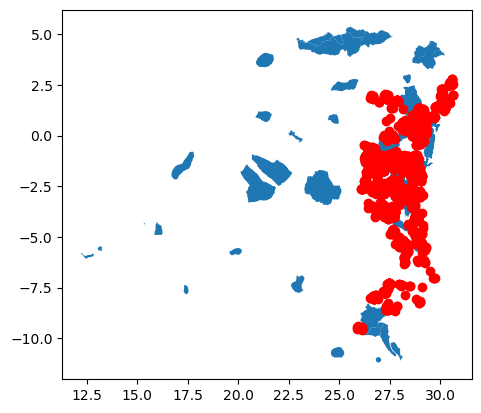

In [27]:
ax=national_parks.plot()
mining_sites.plot(ax=ax,color="red")

In [28]:
mining_sites_utm = mining_sites.to_crs("EPSG:32735")
national_parks_utm = national_parks.to_crs("EPSG:32735")

In [48]:
mining_sites_utm.crs

<Projected CRS: EPSG:32735>
Name: WGS 84 / UTM zone 35S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 24°E and 30°E, southern hemisphere between 80°S and equator, onshore and offshore. Botswana. Burundi. Democratic Republic of the Congo (Zaire). Rwanda. South Africa. Tanzania. Uganda. Zambia. Zimbabwe.
- bounds: (24.0, -80.0, 30.0, 0.0)
Coordinate Operation:
- name: UTM zone 35S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

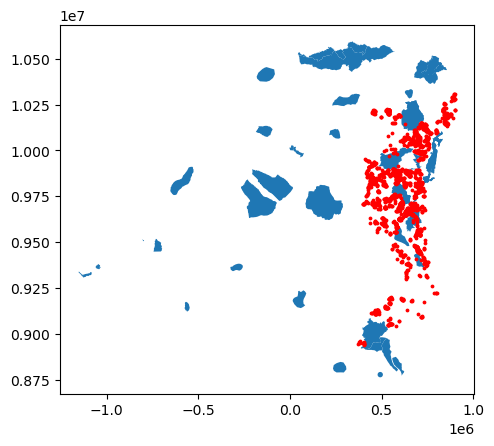

In [32]:
ax = national_parks_utm.plot()
mining_sites_utm.plot(ax=ax, color='red',markersize=3)
plt.show()

In [33]:
mining_sites_utm.to_file("D:\Data\Congo\ipis_cod_mines_utm.gpkg",driver='GPKG')
national_parks_utm.to_file("D:\Data\Congo\cod_conservation_utm.shp", driver='ESRI Shapefile')

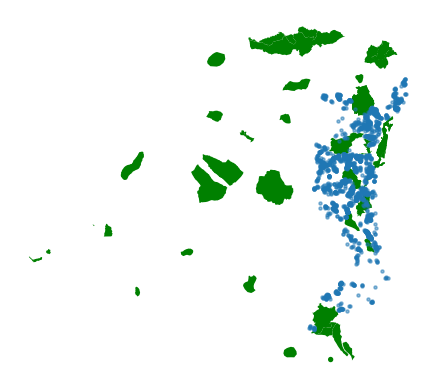

In [52]:
ax=national_parks_utm.plot(color="green")
mining_sites_utm.plot(ax=ax,markersize=5,alpha=0.5)
ax.set_axis_off()

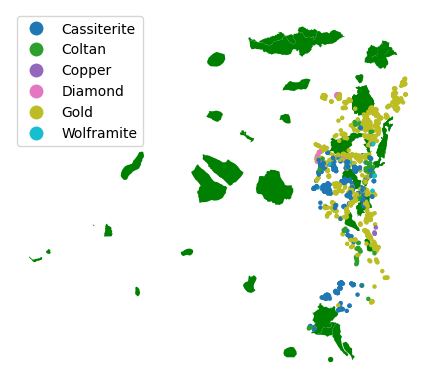

In [54]:
ax=national_parks_utm.plot(color="green")
mining_sites_utm.plot(ax=ax,column="mineral",markersize=5,legend=True)
ax.set_axis_off()

<AxesSubplot:>

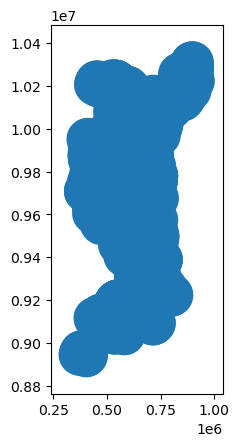

In [66]:
mining_sites_utm.plot(markersize=5)

In [71]:
goma=Point(746989.5594829298,9816380.942287602)

In [74]:
print(goma)

POINT (746989.5594829298 9816380.942287602)


In [75]:
print(type(goma))

<class 'shapely.geometry.point.Point'>


In [77]:
goma_buffer = goma.buffer(50000)

In [78]:
print(type(goma_buffer))
print(goma_buffer)

<class 'shapely.geometry.polygon.Polygon'>
POLYGON ((796989.5594829298 9816380.942287602, 796748.7958165396 9811480.085271124, 796028.8235030912 9806626.426186794, 794836.5762695402 9801866.70842488, 793183.536108494 9797246.770669347, 791085.6227003476 9792811.105446301, 788563.040098057 9788602.430636622, 785640.0821510666 9784661.278079418, 782344.8985422571 9781025.603228275, 778709.223691112 9777730.419619465, 774768.0711339099 9774807.461672474, 770559.3963242297 9772284.879070183, 766123.7311011843 9770186.965662038, 761503.7933456529 9768533.92550099, 756744.0755837362 9767341.67826744, 751890.4164994078 9766621.705953991, 746989.5594829298 9766380.942287602, 742088.7024664517 9766621.705953991, 737235.0433821233 9767341.67826744, 732475.3256202067 9768533.92550099, 727855.3878646753 9770186.965662038, 723419.7226416299 9772284.879070183, 719211.0478319497 9774807.461672474, 715269.8952747475 9777730.419619465, 711634.2204236024 9781025.603228275, 708339.0368147929 9784661.2780

In [81]:
mask=mining_sites_utm.within(goma_buffer)
mask

0       False
1       False
2       False
3       False
4       False
        ...  
2138    False
2139     True
2140     True
2141    False
2142    False
Length: 2143, dtype: bool

In [82]:
mask.sum()

87

In [87]:
national_parks_utm.intersection(goma_buffer)

c:\Users\Nevra\anaconda3\lib\site-packages\shapely\set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)


0                                         POLYGON EMPTY
1     MULTIPOLYGON (((735598.495 9817689.753, 735666...
2                                         POLYGON EMPTY
3                                         POLYGON EMPTY
4                                         POLYGON EMPTY
5                                         POLYGON EMPTY
6                                         POLYGON EMPTY
7                                         POLYGON EMPTY
8                                         POLYGON EMPTY
9                                         POLYGON EMPTY
10                                        POLYGON EMPTY
11                                        POLYGON EMPTY
12                                        POLYGON EMPTY
13                                        POLYGON EMPTY
14                                        POLYGON EMPTY
15                                        POLYGON EMPTY
16                                        POLYGON EMPTY
17                                        POLYGO

In [92]:
national_parks_utm.intersection(goma_buffer).area.sum() / 1000**2

c:\Users\Nevra\anaconda3\lib\site-packages\shapely\set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)


3894.8385678792915

In [101]:
kahuzi=national_parks_utm[national_parks_utm['NAME'] == "Kahuzi-Biega"].geometry.squeeze()

In [113]:
sites_kahuzi=mining_sites_utm[mining_sites_utm.within(kahuzi)]
sites_kahuzi

,visit_date,name,n_workers,mineral,geometry
661,2013-08-28,Ibozia/Kalumé,80.0,Cassiterite,POINT (567832.709 9759143.339)
662,2013-08-26,Matamba,150.0,Cassiterite,POINT (598323.539 9758688.142)
663,2013-08-27,Mutete/Mukina,170.0,Cassiterite,POINT (570733.437 9761871.114)
664,2013-08-28,Mutete,100.0,Cassiterite,POINT (569881.093 9762219.111)
760,2014-02-25,Mazankala,120.0,Cassiterite,POINT (613075.533 9722956.980)
813,2015-07-28,Kitendebwa,50.0,Gold,POINT (693078.928 9770107.518)
869,2013-09-28,Sebwa-Lukoma,130.0,Cassiterite,POINT (660406.345 9715261.717)
870,2013-10-30,Rwamakaza,160.0,Cassiterite,POINT (661266.834 9716072.199)
1481,2009-01-01,Mugaba I,50.0,Gold,POINT (685167.371 9744069.967)
1482,2009-01-01,Mugaba Ouest,46.0,Gold,POINT (683156.687 9746324.416)


In [118]:
sites_kahuzi.name.count()

11

In [125]:
national_parks_utm

,DESIG_ENG,NAME,geometry
0,Classified Forest and Community Reserve,Lyondji Bonobo Community Reserve,"MULTIPOLYGON (((30396.594 10020600.079, 30542...."
1,"Ramsar Site, Wetland of International Importance",Parc national des Virunga,"MULTIPOLYGON (((735540.644 9817696.449, 735598..."
2,Scientific Reserve,Luo Scientific Reserve,"MULTIPOLYGON (((6196.581 10027613.404, 6856.29..."
3,Integrale Nature Reserve,Salonga,"MULTIPOLYGON (((-227210.952 9829733.977, -2271..."
4,UNESCO-MAB Biosphere Reserve,Réserve forestière de Luki,"MULTIPOLYGON (((-1038605.456 9373038.040, -103..."
5,Nature Reserve,Mangrove Nature Reserve or Marine Park,"MULTIPOLYGON (((-1134038.340 9322070.594, -112..."
6,National Park,Parc Marin des Mangroves,"MULTIPOLYGON (((-1112314.327 9319142.330, -111..."
7,Nature Reserve,Mangai,"MULTIPOLYGON (((-281442.375 9382457.901, -2793..."
8,Nature Reserve,Tshangalele - Kolwezi,"MULTIPOLYGON (((308010.087 8805632.930, 293876..."
9,National Park,Kahuzi-Biega,"MULTIPOLYGON (((597783.510 9817233.531, 598593..."


In [124]:
mining_sites_utm

,visit_date,name,n_workers,mineral,geometry
0,2013-03-27,Mayi-Tatu,150.0,Gold,POINT (796089.416 10111855.174)
1,2013-03-27,Mabanga,115.0,Gold,POINT (795899.664 10110990.840)
2,2013-03-27,Molende,130.0,Gold,POINT (795641.707 10109059.787)
3,2013-03-27,Embouchure,135.0,Gold,POINT (794376.309 10110622.250)
4,2013-03-27,Apumu-Atandele-Jerusalem-Luka Yayo,270.0,Gold,POINT (796057.504 10105781.548)
...,...,...,...,...,...
2138,2017-12-14,G4,150.0,Cassiterite,POINT (563553.658 9744447.722)
2139,2017-08-28,Busonga,5.0,Coltan,POINT (731723.859 9780128.598)
2140,2017-08-28,Buterere/Jolie,15.0,Wolframite,POINT (732096.620 9779660.636)
2141,2017-08-30,Rusengasi,80.0,Cassiterite,POINT (728652.127 9751207.676)


In [123]:
sites_within_park = geopandas.sjoin(mining_sites_utm, national_parks_utm, predicate='within', how='inner')
sites_within_park

,visit_date,name,n_workers,mineral,geometry,index_right,DESIG_ENG,NAME
253,2013-09-05,Kiviri/Tayna,244.0,Gold,POINT (709734.913 9961013.720),23,Nature Reserve,Tayna
578,2015-09-02,Lubondozi 3,30.0,Gold,POINT (578464.315 9555456.293),29,Hunting Area,Luama-Kivu
579,2015-09-02,Katamu,180.0,Gold,POINT (576249.903 9554313.725),29,Hunting Area,Luama-Kivu
580,2015-09-02,Kimabwe 1,120.0,Gold,POINT (576425.777 9556329.634),29,Hunting Area,Luama-Kivu
581,2015-09-02,Lubondozi 1,300.0,Gold,POINT (579164.711 9554722.924),29,Hunting Area,Luama-Kivu
...,...,...,...,...,...,...,...,...
1731,2015-10-10,Muyembi,80.0,Gold,POINT (674695.485 10114220.820),42,World Heritage Site,Okapi Wildlife Reserve
1734,2015-10-10,Paradiso,85.0,Gold,POINT (680595.915 10111238.259),42,World Heritage Site,Okapi Wildlife Reserve
1247,2015-06-29,Ujumo Kopa,192.0,Gold,POINT (591129.707 9917867.683),12,National Park,Maiko
1273,2015-11-03,Angumu (rivière),51.0,Gold,POINT (581603.568 9983419.125),12,National Park,Maiko


In [128]:
sites_within_park.name.unique()

array(['Kiviri/Tayna', 'Lubondozi 3', 'Katamu', 'Kimabwe 1',
       'Lubondozi 1', 'Lubondozi 2', 'Tchangobo', 'Kamungazi katamu',
       'Kimabwe 2', 'Lubondozi 4', 'Ibozia/Kalumé', 'Matamba',
       'Mutete/Mukina', 'Mutete', 'Mazankala', 'Kitendebwa',
       'Sebwa-Lukoma', 'Rwamakaza', 'Mugaba I', 'Mugaba Ouest',
       'Nguba(Nkuba) kamisoke', 'Kananga', 'Nzombe', 'Bitonde foret',
       'Kakanga', 'Kasenge', 'Katotela', 'Makenda1', 'Mayimoto', 'Miki 2',
       'Miki 4', 'Miki 5', 'Nguza', 'Kiandjo', 'Mayengo', 'Cigubi',
       'Mwana', 'Colline 7', 'Shakatembo', 'Colline 5', 'Kiwandawanda',
       'Lugundu', 'Colline 4', 'Kenya', 'Mulolwa', 'Shibukumba', 'Kalemi',
       'Nganda', 'Muchacha', 'Muyembi', 'Paradiso', 'Ujumo Kopa',
       'Angumu (rivière)', 'Maisha'], dtype=object)

In [141]:
mining_sites_utm.loc[0]

visit_date                                      2013-03-27
name                                             Mayi-Tatu
n_workers                                            150.0
mineral                                               Gold
geometry      POINT (796089.4159891906 10111855.174263744)
Name: 0, dtype: object

In [138]:
single_mine = mining_sites_utm.loc[0,"geometry"]

In [140]:
print(single_mine)

POINT (796089.4159891906 10111855.174263744)


In [142]:
dist = national_parks_utm.distance(single_mine)

In [143]:
dist

0     7.305166e+05
1     2.156737e+04
2     7.805325e+05
3     8.410806e+05
4     1.977867e+06
5     2.033133e+06
6     2.065059e+06
7     1.287711e+06
8     1.365293e+06
9     3.479939e+05
10    3.021341e+05
11    1.081372e+06
12    1.594780e+05
13    1.167624e+06
14    1.649761e+06
15    1.133980e+06
16    1.620460e+06
17    4.837185e+05
18    4.537492e+05
19    8.370019e+04
20    9.295885e+05
21    2.521048e+05
22    2.217272e+05
23    1.578643e+05
24    1.166480e+06
25    1.702607e+06
26    1.942011e+05
27    6.431577e+05
28    5.689090e+05
29    5.648862e+05
30    1.354571e+06
31    1.975936e+06
32    5.229051e+05
33    8.910110e+05
34    6.318370e+05
35    1.340168e+06
36    1.922936e+05
37    2.156707e+04
38    6.704671e+05
39    4.382726e+05
40    2.983529e+05
41    3.477744e+05
42    8.370019e+04
43    8.402286e+05
44    2.156737e+04
dtype: float64

In [151]:
dist.min()

21567.07274475195

In [150]:
dist[22]

221727.16323582426

In [152]:
idx = dist.idxmin()

In [153]:
idx

37

In [156]:
closest_park=national_parks_utm.loc[idx,"NAME"]
closest_park

'Virunga'

In [160]:
def closest_national_park(geom, national_parks):
    dist = national_parks.distance(geom)
    idx = dist.idxmin()
    closest_park = national_parks.loc[idx,"NAME"]
    return closest_park

In [161]:
closest_national_park(single_mine,national_parks_utm)

'Virunga'

In [162]:
mining_sites_utm.geometry

0       POINT (796089.416 10111855.174)
1       POINT (795899.664 10110990.840)
2       POINT (795641.707 10109059.787)
3       POINT (794376.309 10110622.250)
4       POINT (796057.504 10105781.548)
                     ...               
2138     POINT (563553.658 9744447.722)
2139     POINT (731723.859 9780128.598)
2140     POINT (732096.620 9779660.636)
2141     POINT (728652.127 9751207.676)
2142     POINT (729069.101 9750106.765)
Name: geometry, Length: 2143, dtype: geometry

In [164]:
mining_sites_utm['closest_park']=mining_sites_utm.geometry.apply(closest_national_park, national_parks=national_parks_utm)

In [165]:
mining_sites_utm

,visit_date,name,n_workers,mineral,geometry,closest_park
0,2013-03-27,Mayi-Tatu,150.0,Gold,POINT (796089.416 10111855.174),Virunga
1,2013-03-27,Mabanga,115.0,Gold,POINT (795899.664 10110990.840),Virunga
2,2013-03-27,Molende,130.0,Gold,POINT (795641.707 10109059.787),Virunga
3,2013-03-27,Embouchure,135.0,Gold,POINT (794376.309 10110622.250),Virunga
4,2013-03-27,Apumu-Atandele-Jerusalem-Luka Yayo,270.0,Gold,POINT (796057.504 10105781.548),Virunga
...,...,...,...,...,...,...
2138,2017-12-14,G4,150.0,Cassiterite,POINT (563553.658 9744447.722),Kahuzi-Biega
2139,2017-08-28,Busonga,5.0,Coltan,POINT (731723.859 9780128.598),Kahuzi-Biega
2140,2017-08-28,Buterere/Jolie,15.0,Wolframite,POINT (732096.620 9779660.636),Kahuzi-Biega
2141,2017-08-30,Rusengasi,80.0,Cassiterite,POINT (728652.127 9751207.676),Kahuzi-Biega


In [171]:
src = rasterio.open(r"D:\Data\trees_central-africa\trees_central-africa\trees_central-africa.tif")

In [172]:
src

<open DatasetReader name='D:/Data/trees_central-africa/trees_central-africa/trees_central-africa.tif' mode='r'>

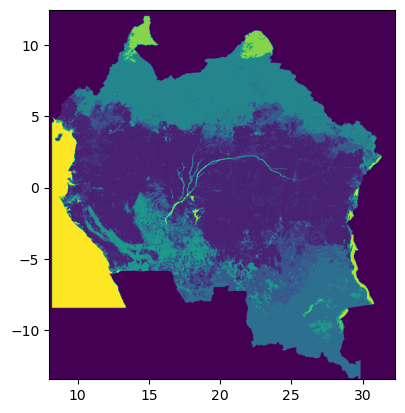

<Figure size 640x480 with 0 Axes>

In [176]:
ax=rasterio.plot.show(src)
mining_sites_utm.plot(ax=ax,color="red",markersize=1)
plt.show()

In [195]:
vegetation_raster = r"D:\Data\trees_central-africa\trees_central-africa\trees_central-africa.tif"

In [196]:
mining_sites_utm['vegetation'] = rasterstats.point_query(mining_sites_utm.geometry, vegetation_raster, interpolate='nearest')

c:\Users\Nevra\anaconda3\lib\site-packages\rasterstats\io.py:335: NodataWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn(


In [197]:
mining_sites_utm.head()

,visit_date,name,n_workers,mineral,geometry,closest_park,vegetation
0,2013-03-27,Mayi-Tatu,150.0,Gold,POINT (796089.416 10111855.174),Virunga,None
1,2013-03-27,Mabanga,115.0,Gold,POINT (795899.664 10110990.840),Virunga,None
2,2013-03-27,Molende,130.0,Gold,POINT (795641.707 10109059.787),Virunga,None
3,2013-03-27,Embouchure,135.0,Gold,POINT (794376.309 10110622.250),Virunga,None
4,2013-03-27,Apumu-Atandele-Jerusalem-Luka Yayo,270.0,Gold,POINT (796057.504 10105781.548),Virunga,None


IndexError: index 0 is out of bounds for axis 0 with size 0

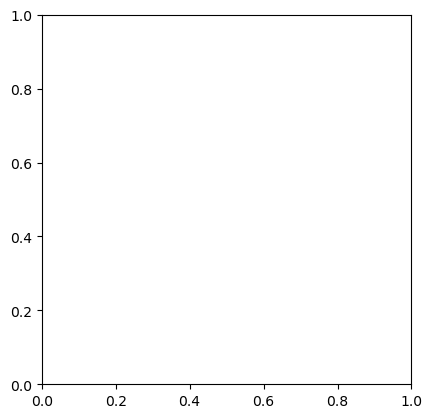

In [200]:
mining_sites_utm.plot(column='vegetation', legend=True)
plt.show()